In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system

In [2]:
from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path

In [3]:
!ls

 ComputerScience_CAHighSchools.csv
 cs10_2015
 cs10_2016
 cs10_2017
 cs10_fa2018
 cs10_fa2019
 cs10_ppsk2015_2019
 cs10_sp2018
 cs10_sp2019
 cs61b_2015
 cs61b_2016
 d8_2015
 d8_2016
 d8_2017
 d8_fa2018
 d8_ppsk2015_2019
 d8_sp2018
 d8_sp2019
 data.zip
'Prior Experience.ipynb'
 uc.berkeley.stem.pathways.2007.2017.txt
 uc.berkeley.student.course.data.2007.txt
 uc.berkeley.student.course.data.2008.txt
 uc.berkeley.student.course.data.2009.txt
 uc.berkeley.student.course.data.2010.txt
 uc.berkeley.student.course.data.2011.txt
 uc.berkeley.student.course.data.2012.txt
 uc.berkeley.student.course.data.2013.txt
 uc.berkeley.student.course.data.2014.txt
 uc.berkeley.student.course.data.2015.txt
 uc.berkeley.student.course.data.2016.txt
 uc.berkeley.student.course.data.2017.txt
 uc.berkeley.student.course.data.2018.fall.txt
 uc.berkeley.student.course.data.2018.spring.txt
 uc.berkeley.student.course.data.2018.summer.txt
 uc.berkeley.student.course.data.2019.fall.txt
 uc.berkeley.student.course.

In [4]:
majors2007_2017 = pd.read_csv("uc.berkeley.student.majors.2007.2017.txt", sep="\t", low_memory=False)

In [5]:
course_data2007 = pd.read_csv("uc.berkeley.student.course.data.2007.txt", sep="\t", low_memory=False)
course_data2008 = pd.read_csv("uc.berkeley.student.course.data.2008.txt", sep="\t", low_memory=False)
course_data2009 = pd.read_csv("uc.berkeley.student.course.data.2009.txt", sep="\t", low_memory=False)
course_data2010 = pd.read_csv("uc.berkeley.student.course.data.2010.txt", sep="\t", low_memory=False)
course_data2011 = pd.read_csv("uc.berkeley.student.course.data.2011.txt", sep="\t", low_memory=False)
course_data2012 = pd.read_csv("uc.berkeley.student.course.data.2012.txt", sep="\t", low_memory=False)
course_data2013 = pd.read_csv("uc.berkeley.student.course.data.2013.txt", sep="\t", low_memory=False)
course_data2014 = pd.read_csv("uc.berkeley.student.course.data.2014.txt", sep="\t", low_memory=False)
course_data2015 = pd.read_csv("uc.berkeley.student.course.data.2015.txt", sep="\t", low_memory=False)
course_data2016 = pd.read_csv("uc.berkeley.student.course.data.2016.txt", sep="\t", low_memory=False)
course_data2017 = pd.read_csv("uc.berkeley.student.course.data.2017.txt", sep="\t", low_memory=False)

In [6]:
sp07_17 = pd.read_csv("uc.berkeley.stem.pathways.2007.2017.txt", sep="\t", low_memory=False)
females_only = sp07_17[sp07_17['gender'] == 'Female']
females_only['major.intended.department'].value_counts()

L&S Undeclared                    9381
Molecular & Cell Biology          4362
Psychology                        2169
English                           2006
Political Science                 1844
                                  ... 
Other Math & Physical Sci Pgms      21
Slavic Languages & Literatures      21
Scandinavian                        21
Engineering Joint Programs          11
Other Chemistry Programs             9
Name: major.intended.department, Length: 69, dtype: int64

In [7]:
intended_cs = sp07_17[sp07_17['major.intended.department'] == 'L&S Computer Science']
gpa = intended_cs['hs.gpa.unweighted']

## Loading and Filtering 2015-2019 Datasets (Post Grade Cap)

In [8]:
#Load 2015 courses, filter for DS/CS/Statistics
courses_2015 = pd.read_csv("uc.berkeley.student.course.data.2015.txt", sep="\t", low_memory=False)
ds_2015 = courses_2015[courses_2015["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [9]:
#D8 Pilot in Fall 2015
d8_2015 = ds_2015[ds_2015["course.subject"].isin(["Statistics", "Computer Science"])]
d8_2015 = d8_2015[d8_2015["course.number"].isin(["94"])]
d8_2015 = d8_2015[d8_2015["section.number"].isin(["1"])]
d8_ppsk = np.array(ds_2015["ppsk"]) #Save Data 8 2015 ppsk to array of all ppsks in data 8 
d8_2015.to_csv("d8_2015")

In [10]:
#Filter for CS 10 in 2015, only lecture, save CS 10 ppsk from 2015
cs10_2015 = ds_2015[ds_2015["course.number"].isin(["10"])]
cs10_2015 = cs10_2015[cs10_2015["section.number"] == "1"]
cs10_ppsk = np.array(cs10_2015["ppsk"])
cs10_2015.to_csv("cs10_2015")

In [11]:
#61B in 2015 
cs61b_2015 = ds_2015[ds_2015["course.number"].isin(["61B"])]
cs61b_2015 = cs61b_2015[cs61b_2015["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_2015["ppsk"])
cs61b_2015.to_csv("cs61b_2015")

In [12]:
courses_2016 = pd.read_csv("uc.berkeley.student.course.data.2016.txt", sep="\t", low_memory=False)
ds_2016 = courses_2016[courses_2016["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [13]:
#Data 8 data from 2016
d8_2016 = ds_2016[ds_2016["course.subject"].isin(["Statistics", "Computer Science"])]
d8_2016 = d8_2016[d8_2016["course.number"].isin(["C8", "8"])]
d8_2016 = d8_2016[d8_2016["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_2016["ppsk"]))
d8_2016.to_csv("d8_2016")

In [14]:
#Load 2016 courses, filter for DS/CS/Statistics
cs10_2016 = ds_2016[ds_2016["course.subject"] == "Computer Science"]
cs10_2016 = cs10_2016[cs10_2016["course.number"] == "10"]
cs10_2016 = cs10_2016[cs10_2016["section.number"] == "1"]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_2016['ppsk']))
cs10_2016.to_csv("cs10_2016")

In [15]:
#61B in 2015
cs61b_2016 = ds_2016[ds_2016["course.number"].isin(["61B"])]
cs61b_2016 = cs61b_2016[cs61b_2016["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_2016["ppsk"])
cs61b_2016.to_csv("cs61b_2016")

In [16]:
#Load 2017 courses, filter for DS/CS/Statistics
courses_2017 = pd.read_csv("uc.berkeley.student.course.data.2017.txt", sep="\t", low_memory=False)
ds_2017 = courses_2017[courses_2017["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [17]:
# Filter only Data 8 lecture, append 2017 ppsks
d8_2017 = ds_2017[ds_2017["course.subject"].isin(["Statistics", "Computer Science"])]
d8_2017 = d8_2017[d8_2017["course.number"].isin(["C8"])]
d8_2017 = d8_2017[d8_2017["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_2017["ppsk"]))
d8_2017.to_csv("d8_2017")

In [18]:
# Filter only CS10, append 2017 ppsks
cs10_2017 = ds_2017[ds_2017["course.subject"] == "Computer Science"]
cs10_2017 = cs10_2017[cs10_2017["course.number"] == "10"]
cs10_2017 = cs10_2017[cs10_2017["section.number"] == "1"]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_2017["ppsk"]))
cs10_2017.to_csv("cs10_2017")

In [39]:
#61B in 2017
cs61b_2017 = ds_2017[ds_2017["course.number"].isin(["61B"])]
cs61b_2017 = cs61b_2017[cs61b_2017["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_2017["ppsk"])
cs61b_2017.to_csv("cs61b_2017")

In [20]:
#Load Fall 2018 courses, filter for DS/CS/Statistics
courses_fa2018 = pd.read_csv("uc.berkeley.student.course.data.2018.fall.txt", sep="\t", low_memory=False)
ds_fa2018 = courses_fa2018[courses_fa2018["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [21]:
ds_fa2018[ds_fa2018['course.number'] == 'C8']

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
109,2018 Fall,845402,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A-,3.7,4.0
404,2018 Fall,1311138,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
488,2018 Fall,1470872,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,B,Letter Grade,B-,2.7,4.0
815,2018 Fall,1479215,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
897,2018 Fall,1480365,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101054,2018 Fall,3312458,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,B,Letter Grade,B+,3.3,4.0
101057,2018 Fall,3312460,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,B,Letter Grade,B+,3.3,4.0
101372,2018 Fall,3315661,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
101717,2018 Fall,3318465,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,27696,697,Foundation Data Sci,NaN,A,Letter Grade,A-,3.7,4.0


In [22]:
#Data 8 data from Fall 2018
d8_fa2018 = ds_fa2018[ds_fa2018["course.subject"].isin(["Statistics", "Computer Science"])]
d8_fa2018 = d8_fa2018[d8_fa2018["course.number"] == 'C8']
d8_fa2018 = d8_fa2018[d8_fa2018["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_fa2018["ppsk"]))
d8_fa2018.to_csv("d8_fa2018")

In [23]:
#CS 10 data from Fall 2018
cs10_fa2018 = ds_fa2018[ds_fa2018["course.subject"].isin(["Statistics", "Computer Science"])]
cs10_fa2018 = cs10_fa2018[cs10_fa2018["course.number"] == '10']
cs10_fa2018 = cs10_fa2018[cs10_fa2018["section.number"].isin(["1"])]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_fa2018["ppsk"]))
cs10_fa2018.to_csv("cs10_fa2018")

In [38]:
#61B in Fall 2018
cs61b_fa2018 = ds_fa2018[ds_fa2018["course.number"].isin(["61B"])]
cs61b_fa2018 = cs61b_fa2018[cs61b_fa2018["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_fa2018["ppsk"])
cs61b_fa2018.to_csv("cs61b_fa2018")

In [29]:
#Load and filter Spring 2018
courses_sp2018 = pd.read_csv("uc.berkeley.student.course.data.2018.spring.txt", sep="\t", low_memory=False)
ds_sp2018 = courses_sp2018[courses_sp2018["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [30]:
#Data 8 data from Spring 2018
d8_sp2018 = ds_sp2018[ds_sp2018["course.subject"].isin(["Statistics", "Computer Science"])]
d8_sp2018 = d8_sp2018[d8_sp2018["course.number"] == 'C8']
d8_sp2018 = d8_sp2018[d8_sp2018["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_sp2018["ppsk"]))
d8_sp2018.to_csv("d8_sp2018")

In [31]:
#CS 10 data from Spring 2018
cs10_sp2018 = ds_sp2018[ds_sp2018["course.subject"].isin(["Statistics", "Computer Science"])]
cs10_sp2018 = cs10_sp2018[cs10_sp2018["course.number"] == '10']
cs10_sp2018 = cs10_sp2018[cs10_sp2018["section.number"].isin(["1"])]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_sp2018["ppsk"]))
cs10_sp2018.to_csv("cs10_sp2018")

In [36]:
#CS 61B data from Spring 2018
cs61b_sp2018 = ds_sp2018[ds_sp2018["course.number"].isin(["61B"])]
cs61b_sp2018 = cs61b_sp2018[cs61b_sp2018["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_sp2018["ppsk"])
cs61b_sp2018.to_csv("cs61b_sp2018")

In [33]:
#Load and filter Fall 2019
courses_fa2019 = pd.read_csv("uc.berkeley.student.course.data.2019.fall.txt", sep="\t", low_memory=False)
ds_fa2019 = courses_fa2019[courses_fa2019["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [34]:
#Data 8 data from Fall 2019
d8_fa2019 = ds_fa2019[ds_fa2019["course.subject"].isin(["Statistics", "Computer Science"])]
d8_fa2019 = d8_fa2019[d8_fa2019["course.number"] == 'C8']
d8_fa2019 = d8_fa2019[d8_fa2019["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_fa2019["ppsk"]))
d8_fa2018.to_csv("d8_fa2018")

In [35]:
#CS 10 data from Fall 2019
cs10_fa2019 = ds_fa2019[ds_fa2019["course.subject"].isin(["Statistics", "Computer Science"])]
cs10_fa2019 = cs10_fa2019[cs10_fa2019["course.number"] == '10']
cs10_fa2019 = cs10_fa2019[cs10_fa2019["section.number"].isin(["1"])]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_fa2019["ppsk"]))
cs10_fa2019.to_csv("cs10_fa2019")

In [40]:
#CS 61B data from Fall 2019
cs61b_fa2019 = ds_fa2019[ds_fa2019["course.number"].isin(["61B"])]
cs61b_fa2019 = cs61b_fa2019[cs61b_fa2019["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_fa2019["ppsk"])
cs61b_fa2019.to_csv("cs61b_fa2019")

In [41]:
#Load and filter Spring 2019
courses_sp2019 = pd.read_csv("uc.berkeley.student.course.data.2019.spring.txt", sep="\t", low_memory=False)
ds_sp2019 = courses_sp2019[courses_sp2019["course.department"].isin(["Data Science", "Electrical Eng & Computer Sci", "Statistics"])]

In [42]:
#Data 8 data from Spring 2019
d8_sp2019 = ds_sp2019[ds_sp2019["course.subject"].isin(["Statistics", "Computer Science"])]
d8_sp2019 = d8_sp2019[d8_sp2019["course.number"] == 'C8']
d8_sp2019 = d8_sp2019[d8_sp2019["section.number"].isin(["1"])]
d8_ppsk = np.append(d8_ppsk, np.array(d8_sp2019["ppsk"]))
d8_sp2019.to_csv("d8_sp2019")

In [43]:
#CS 10 data from Spring 2019
cs10_sp2019 = ds_sp2019[ds_sp2019["course.subject"].isin(["Statistics", "Computer Science"])]
cs10_sp2019 = cs10_sp2019[cs10_sp2019["course.number"] == '10']
cs10_sp2019 = cs10_sp2019[cs10_sp2019["section.number"].isin(["1"])]
cs10_ppsk = np.append(cs10_ppsk, np.array(cs10_sp2019["ppsk"]))
cs10_sp2019.to_csv("cs10_sp2019")

In [44]:
#CS 61B data from Spring 2019
cs61b_sp2019 = ds_sp2019[ds_sp2019["course.number"].isin(["61B"])]
cs61b_sp2019 = cs61b_sp2019[cs61b_sp2019["section.number"] == "1"]
cs61b_ppsk = np.array(cs61b_sp2019["ppsk"])
cs61b_sp2019.to_csv("cs61b_sp2019")

In [47]:
#Load all Data 8 ppsk's into dataframe
d8_ppsk_df = pd.DataFrame(d8_ppsk)
d8_ppsk_df.to_csv("d8_ppsk2015_2019")

In [46]:
#Load all CS 10 ppsk's into dataframe
cs10_ppsk_df = pd.DataFrame(cs10_ppsk)
cs10_ppsk_df.to_csv("cs10_ppsk2015_2019")

In [48]:
#Load all CS 61B ppsk's into dataframe
cs61b_ppsk_df = pd.DataFrame(cs61b_ppsk)
cs61b_ppsk_df.to_csv("cs61b_ppsk2015_2019")

In [54]:
hs_cs = pd.read_csv("ComputerScience_CAHighSchools.csv", names=['School', 'Has_CompSciA', 'Has_CompSciAB',
                                                                'Has_CompSciPrinc', 'Has_IB_CompSci', 
                                                                'Has_CompOpAndSci', 'Has_CompSci', 'Has_ExploringCompSci'])
hs_cs = hs_cs.rename({'School': 'ceeb'})
# hs_cs.merge(sp07_17, on= 'ceeb', how='left')
# sp07_17.merge(hs_cs, left_on='ceeb')

In [55]:
hs_cs.columns = ['School', 'Has_CompSciA', 'Has_CompSciAB','Has_CompSciPrinc', 'Has_IB_CompSci', 'Has_CompOpAndSci', 'Has_CompSci', 'Has_ExploringCompSci']

In [56]:
hs_cs

,,,,,,,,,,,,,,,,,School,Has_CompSciA,Has_CompSciAB,Has_CompSciPrinc,Has_IB_CompSci,Has_CompOpAndSci,Has_CompSci,Has_ExploringCompSci
Year,County,District,ceeb,Has_CompSciA,Grade_Level_CompSciA,Grade_Perc_CompSciA,Has_CompSciAB,Grade_Level_CompSciAB,Grade_Perc_CompSciAB,Has_CompSciPrinc,Grade_Level_CompSciPrinc,Grade_Perc_CompSciPrinc,Has_IB_CompSci,Grade_Level_IB_CompSci,Grade_Perc_IB_CompSci,Has_CompOpAndSci,Grade_Level_CompOpAndSci,Grade_Perc_CompOpAndSci,Has_CompSci,Grade_Level_CompSci,Grade_Perc_CompSci,Has_ExploringCompSci,Grade_Level_ExploringCompSci,Grade_Perc_ExploringCompSci
2007,1,10017,0109835,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,9,.3773585,0,NaN,NaN
1997,1,61119,0130229,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,9,1,1,12,1,0,NaN,NaN
1999,1,61119,0130229,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,0,1,0,NaN,NaN,0,NaN,NaN
2000,1,61119,0130229,1,12,1,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,10,.61290324,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,58,72769,5838305,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,0,1,0,NaN,NaN,0,NaN,NaN
2006,58,72769,5838305,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,0,1,0,NaN,NaN,0,NaN,NaN
2007,58,72769,5838305,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,0,1,0,NaN,NaN,0,NaN,NaN
2008,58,72769,5838305,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,0,1,0,NaN,NaN,0,NaN,NaN


In [6]:
#things to compare: 
females_only['major.intended.department'].value_counts().loc['L&S Computer Science']

527

In [28]:
males_only = stem_pathways_2007_2017[stem_pathways_2007_2017['gender'] == 'Male']
males_only['major.intended.department'].value_counts().loc['L&S Computer Science']

1634

In [34]:
females_only.groupby('year')['major.intended.department'].value_counts()

year  major.intended.department     
2007  L&S Undeclared                    1073
      Molecular & Cell Biology           409
      English                            224
      Psychology                         218
      Political Science                  170
                                        ... 
2016  Nuclear Engineering                  2
      South & SE Asian Studies             2
      Italian Studies                      1
      Scandinavian                         1
      Slavic Languages & Literatures       1
Name: major.intended.department, Length: 668, dtype: int64

In [38]:
females_only.groupby('ethnic.l1')['major.intended.department'].value_counts()

ethnic.l1               major.intended.department     
Asian/Pacific Islander  L&S Undeclared                    3802
                        Molecular & Cell Biology          2367
                        Economics                          844
                        Psychology                         678
                        English                            513
                                                          ... 
White/Other             Other Math & Physical Sci Pgms      10
                        L&S Ops Rsch & Mgmt Sci              6
                        Engineering Joint Programs           5
                        South & SE Asian Studies             4
                        African American Studies             2
Name: major.intended.department, Length: 268, dtype: int64

In [39]:
males_only.groupby('ethnic.l1')['major.intended.department'].value_counts()

ethnic.l1               major.intended.department    
Asian/Pacific Islander  L&S Undeclared                   2587
                        Electrical Eng & Computer Sci    1462
                        Molecular & Cell Biology         1440
                        Economics                         927
                        L&S Computer Science              853
                                                         ... 
White/Other             Ethnic Studies                      7
                        Italian Studies                     6
                        African American Studies            4
                        Gender & Womens Studies             4
                        Other Chemistry Programs            3
Name: major.intended.department, Length: 273, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


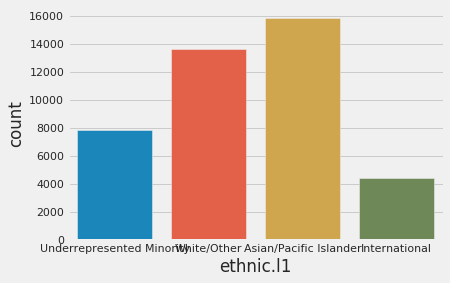

In [42]:
sns.countplot(females_only['ethnic.l1'])

In [89]:
females_only['major.intended.department'].unique()
filtered = females_only['major.intended.department'].isin(top10)
majors = females_only[filtered]

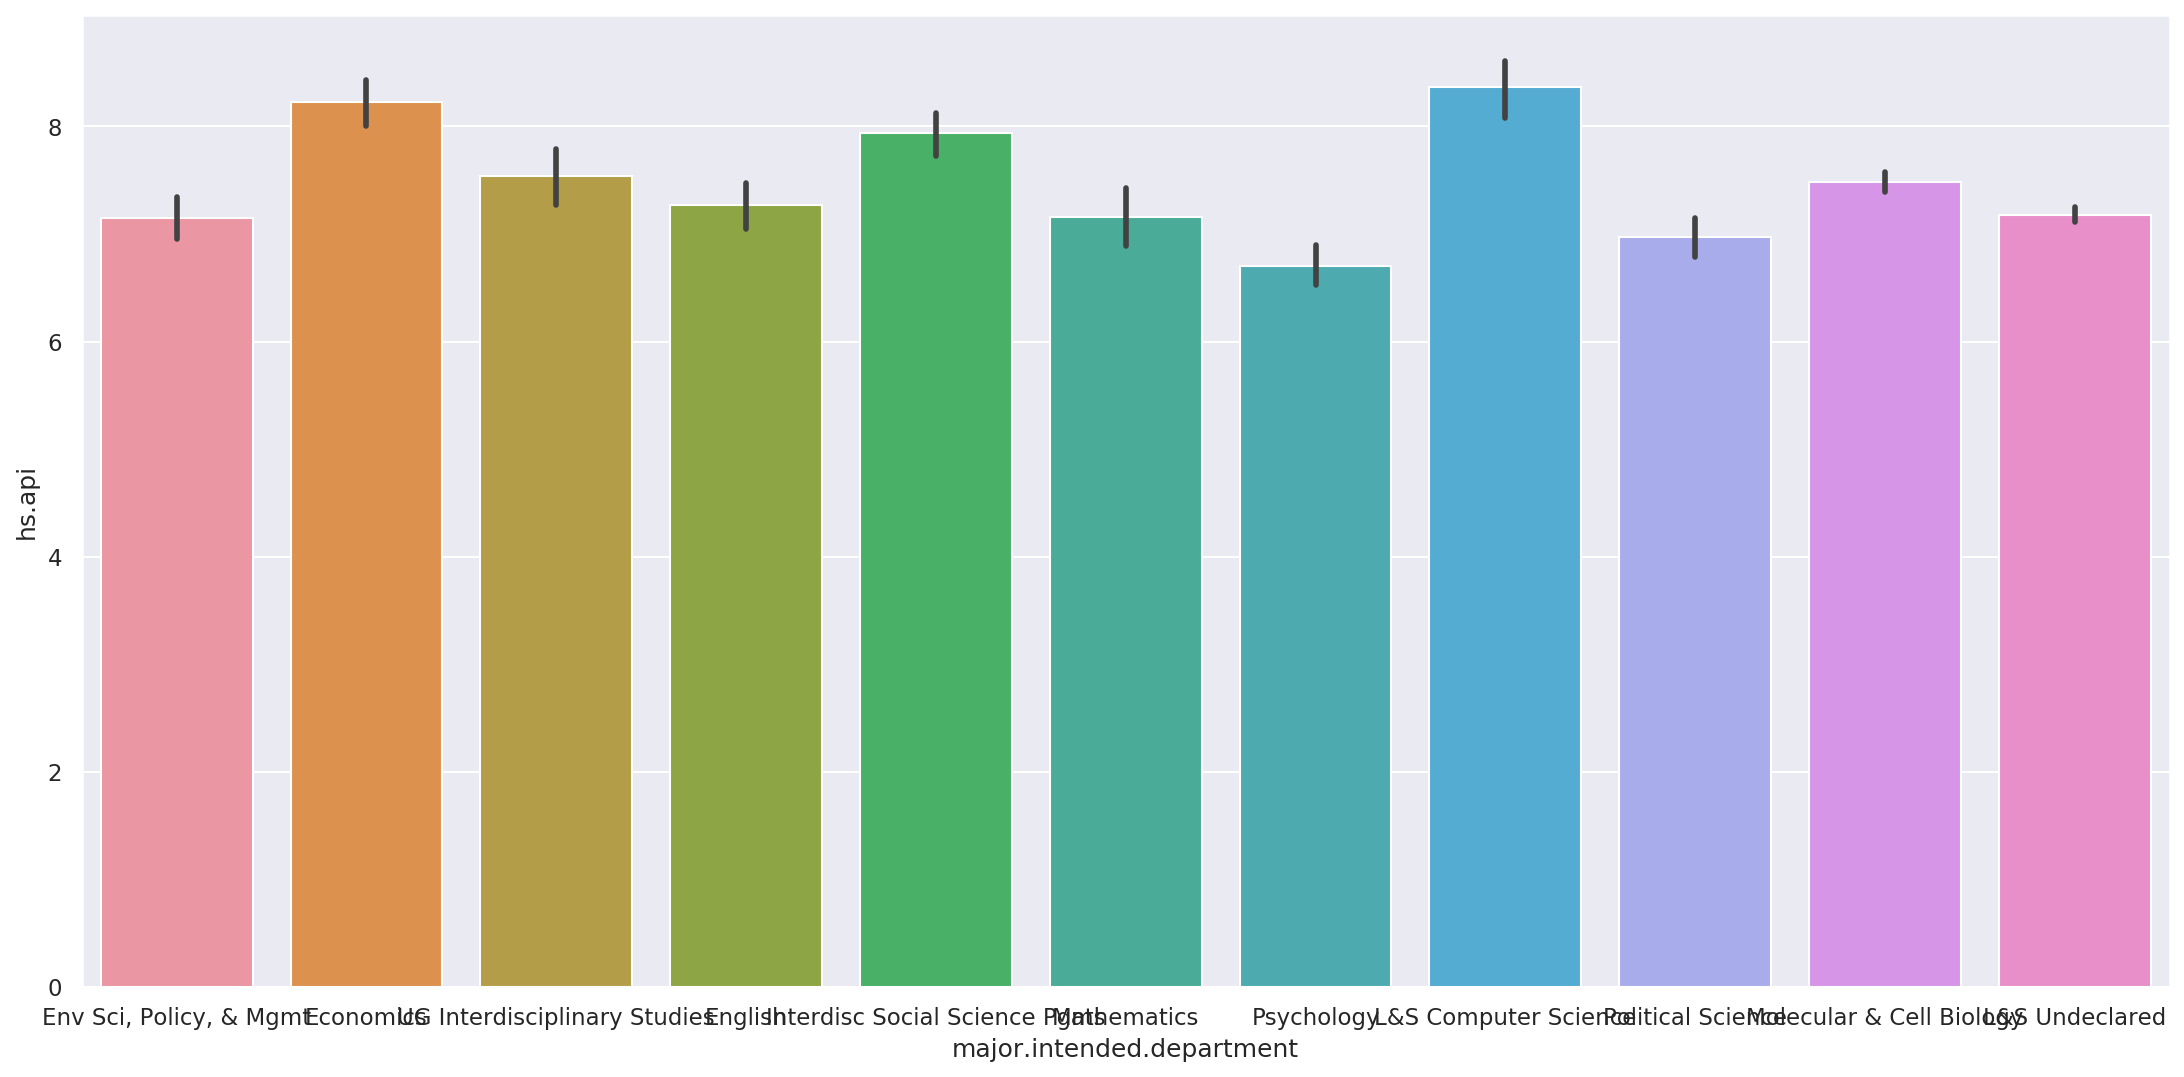

In [90]:
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
sns.barplot(x ='major.intended.department', y='hs.api', data=majors)

In [ ]:
for i in top10: 
    sns.lineplot('hs.api', ysmooth, label=i)
    plt.legend();

In [47]:
by_api = females_only.groupby('hs.api')['major.intended.department'].value_counts()

In [64]:
females_only['major.intended.department'].unique()


array(['Landscape Arch & Env Plan', 'Slavic Languages & Literatures',
       'Architecture', 'Anthropology', 'Env Sci, Policy, & Mgmt',
       'Economics', 'History', 'Philosophy', 'Sociology',
       'UG Interdisciplinary Studies', 'English',
       'Interdisc Social Science Pgms', 'Mathematics', 'History of Art',
       'Psychology', 'Linguistics', 'Rhetoric', 'L&S Computer Science',
       'Mechanical Engineering', 'Geography', 'Ag & Resource Econ & Pol',
       'Political Science', 'Art Practice', 'Business', 'Astronomy',
       'Molecular & Cell Biology', 'Spanish & Portuguese',
       'L&S Envir Econ & Policy', 'East Asian Lang & Culture',
       'City & Regional Planning', 'Nutritional Sciences & Tox', 'German',
       'Plant & Microbial Biology', 'Integrative Biology',
       'Gender & Womens Studies', 'French', 'Bioengineering',
       'L&S Public Health', 'L&S Undeclared', 'Ethnic Studies',
       'Film and Media', 'L&S Chemistry', 'Chem & Biomolecular Eng',
       'Physics',

In [88]:
want = females_only['major.intended.department'].value_counts().sort_values(ascending=False).head(10)
top10 = list(want.index.values) + ['L&S Computer Science']
top10 

['L&S Undeclared',
 'Molecular & Cell Biology',
 'Psychology',
 'English',
 'Political Science',
 'Economics',
 'Interdisc Social Science Pgms',
 'UG Interdisciplinary Studies',
 'Env Sci, Policy, & Mgmt',
 'Mathematics',
 'L&S Computer Science']

In [64]:
#what major people declared in 2019
majors2019 = pd.read_csv("uc.berkeley.student.majors.2019.txt", sep="\t", low_memory=False)

#people who declared CS merged with their application data. People who declared in 2019 likely applied in 2017.
#Plan: merge all major data with application data. Compare what they applied with to what they declared. 
merged = majors2019[majors2019['major']=='L&S Computer Science'].merge(stem_pathways_2007_2017, how='left', on='ppsk')

#count of female CS majors and male CS majors per year 
num_cs_majors_by_year = merged.groupby(['gender', 'year']).agg(sum)
num_cs_majors_by_year['Count of Students'].to_frame()

Count of Students
gender           year                     
Decline to State 2016.0                 65
Female           2008.0                  2
                 2011.0                  2
                 2014.0                  8
                 2015.0                175
                 2016.0                393
Male             2009.0                  1
                 2011.0                  5
                 2012.0                  5
                 2013.0                 13
                 2014.0                 18
                 2015.0                433
                 2016.0                933

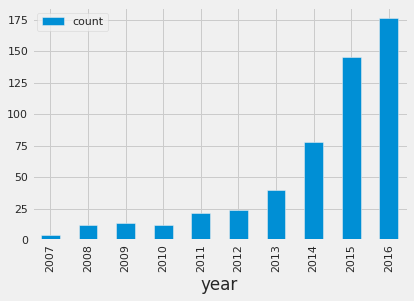

In [71]:
intended_cs = stem_pathways_2007_2017[stem_pathways_2007_2017['major.intended.department']=='L&S Computer Science']
intended_cs_f = intended_cs[intended_cs['gender'] == 'Female']
intended_cs_m = intended_cs[intended_cs['gender'] == 'Male']
# intended_cs = intended_cs.groupby(['gender', 'year']).agg(sum)['count'].to_frame()
females_per_year = intended_cs_f.groupby('year').agg(sum)['count'].to_frame()
males_per_year = intended_cs_m.groupby('year').agg(sum)['count'].to_frame()
# female_count = intended_cs[intended_cs['gender']=='Female']
# male_count = intended_cs[intended_cs['gender']=='Male']
# sns.barplot(x='year', y='count', data=intended_cs)
females_per_year.plot(kind='bar')

In [73]:
ax = sns.barplot(females_per_year, label='females')
ax = sns.barplot(males_per_year, color='green', axlabel= 'Count', label='males')
ax.legend()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [59]:
stem_pathways_2007_2017[stem_pathways_2007_2017['first.major.major.3']== 'L&S Computer Science']

,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,...,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4


In [52]:
stem_pathways_2007_2017[final.major.major.1]=='Computer Science'

0        False
1        False
2        False
3        False
4        False
         ...  
80503    False
80504    False
80505    False
80506    False
80507    False
Name: first.major.major.1, Length: 80508, dtype: bool

In [42]:
majors2007_2017 = pd.read_csv("uc.berkeley.student.majors.2007.2017.txt", sep="\t", low_memory=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte